# Basic reactor models

Revision 0 11 November 2020 By Jonas Roininen

Chemical reaction engineering is one of the basic courses that can be found in every chemical engineering school's undergraduate curriculum. Most courses and textbooks on the subject start with a treatise of the three ideal reactors - Plug flow reactor (PFR), continuous stirred tank reactor (CSTR), and batch reactor (BR). Of course those are important concepts. What many courses don't tell so clearly is how all of those concepts are similar on a fundamental, mathematical level.

The purpose of this chapter is not to teach the reader about reaction mechanisms or kinetics. There are excellent textbooks on that subject, for example H. Scott Fogler's "Elements of Chemical Reaction Engineering (http://umich.edu/~elements/5e/index.html) that has recently come out in it's 6th edition.

I would like to start analyzing chemical reaction engineering problems with looking at the convection-diffusion equation, also known as the transport equation. It is an interesting partial differential equation that can be applied to fluid flow both at the micro level, as well as the macro level. When applied to macro level, meaning the size of a reactor tube, it is more precise to speak of a convection-dispersion-equation and we use it not to model molecular diffusion, but backmixing in a reactor. Backmixing can of course be caused also by molecular diffusion, especially if the flow velocity in the reactor is very slow or the reactor is very small (both relevant for microreactors). But more often, backmixing is simply caused by non-uniform flow caused by local unidealities. Axial dispersion is of course more pronounced in small reactors (laboratory or bench scale) where catalyst particle size is larger in comparison to reactor diameter and lenght than in large industrial reactors.

Let's start by looking at the convection-diffusion equation in detail.

## The Convection-diffusion equation

Let's start with the convection-diffusion equation in its most general form:

\begin{equation}
\frac{\partial \Psi}{\partial t} = - \left(\nabla\cdot \Psi \vec{U}\right) + \left(\nabla\cdot D\nabla \Psi\right) + S\left(\psi,\vec{r}\right)
\end{equation}

where $\Psi$ is the concentration of some property. On the right hand side, the first term is the convection term, the second term is the diffusion term, and the third term is the source term. The meanings of the different terms are:

Convection: $- \left(\nabla\cdot \Psi \vec{U}\right)$ Transport by flow, where $\vec{U}$ is the velocity  field

Diffusion: $\left(\nabla\cdot D\nabla \Psi\right)$ Transport driven by concentration gradient, where D is the diffusion coefficient, or diffusivity

Source: $S\left(\psi,\vec{r}\right)$ Generation or Depletion, e.g. by chemical or nuclear reaction.

Mathematically, the convection-diffusion equation combines elements of a hyperbolic partial differential equation (the convection term) https://en.wikipedia.org/wiki/Hyperbolic_partial_differential_equation and a parabolic partial differential equation (the diffusion term)https://en.wikipedia.org/wiki/Parabolic_partial_differential_equation. Intuitively, one can think that a hyperbolic PDE preserves any discontinuity in the initial solution, while a parabolic PDE smooths them out. Another way is to think that a with a hyperbolic PDE information travels at a finite speed (e.g. the speed of sound in the wave equation) whereas with a parabolic PDE the whole domain experiences any change instantly.

We can substitute different properties for $\Psi $, for instance C for concentration of a species (a chemical component, or bubbles, or particles) or H for enthalpy.

In chemical engineering, it is usually sufficient to consider only one dimension. If we consider only one dimension $z$, where $z$ is the axial coordinate of a reactor tube for instance, then the convection-diffusion equation becomes:

\begin{equation}
\frac{\partial \psi}{\partial t} = - \frac{\partial \left(u\psi\right)}{\partial z} + \frac{\partial}{\partial z}\left(D\frac{\partial \psi}{\partial z}\right) + S\left(\psi,z\right)
\end{equation}

Again the term of the left hand side is the time rate of change of some property, the first term on the right hand side is the convection term, the second term on the right hand side is the diffusion term and the third term on the right hand side is the source term.

We have derived the basic modeling equation that can be used for modeling of almost all process equipment. Once again it is important to note that it is understood here as a macroscopic model for convection, dispersion, and generation in chemical process equipment. These phenomena usually take place in a packed bed of some kind. Formally the above equation is identical with the convection-diffusion equation on a micro level. But in our model the diffusion term does not only describe molecular diffusion, but a phenomenon know as axial dispersion. Axial dispersion shall be understood as a model for the many phenomena that cause dispersion, such as molecular diffusion, turbulence, and residence time distribution. Consequently, the axial dispersion coefficient D should not be set equal to the Diffusion coefficient at molecular level, but it should be regarded as a model parameter that is a function of packing type and size, flow regime (turbulent or laminar), and physical properties of the fluid itself.

Even velocity u is not the actual velocity of the fluid at a certain location inside the reactor tube, but the average velocity at a value of the certain axial coordinate. If the flow takes place in a porous bed (e.g. a catalyst bed) or it is a multiphase flow, then u is the (hypothetical) superficial velocity $\frac{\dot{V}}{A}$ where A is the cross-sectional area of the empty tube.

Starting with this equation, we would like to derive a model for tubular chemical reactors.

If we assume constant velocity u $[m s^{-1}]$ (meaning that the fluid is incompressible) and constant axial dispersion coefficient D $[m^2 s^{-1}]$, the equation can be simplified to:

\begin{equation}
\frac{\partial \psi}{\partial t} = - u \frac{\partial \psi}{\partial z} + D \frac{\partial^2 \psi}{\partial z^2} + S\left(\psi,z\right)
\end{equation}

This equation is a linear partial differential equation since it is linear with respect to the partial derivatives of $\psi$.
In steady-state the equation becomes:

\begin{equation}
0 = - u \frac{d \psi}{d z} + D \frac{d^2 \psi}{d z^2} + S\left(\psi,z\right)
\end{equation}

For a chemical reaction in a reactor let's introduce concentration C $[mol m^{-3}]$ for $\psi$ and reaction rate R $[mol m^{-3} s^{-1}]$ for S. The reaction rate depends on temperature and the concentration of species C. Here we can understand C as a vector that contains the concentrations of all species in the mixture.

\begin{equation}
0 = - u \frac{d C}{d z} + D \frac{d^2 C}{d z^2} + R\left(C,T\right)
\end{equation}

If we further assume that there is no axial dispersion, we get the very widely used plug flow reactor model:

\begin{equation}
0 = - u \frac{d C}{d z} + S\left(C,T\right)
\end{equation}

This is a differential equation that can be readily solved with any ODE solver but for simple reaction terms also analytical solutions can be found. Let's assume that we have a chemical reaction A + B -> C

\begin{align}
r_A &= -k_{AB} C_A C_B \\
r_B &= -k_{AB} C_A C_B \\
r_C &= k_{AB} C_A C_B
\end{align}

Now we can write down our system of ordinary differential equations (ODE):

\begin{align}
\frac{d C_A}{d z} &= -\frac{k_{AB}}{u} C_A C_B \\
\frac{d C_B}{d z} &= -\frac{k_{AB}}{u} C_A C_B \\
\frac{d C_C}{d z} &= \frac{k_{AB}}{u} C_A C_B 
\end{align}

### Isothermal plug-flow reactor

In the previous paragraph we derived our plug flow reactor model:

\begin{equation}
0 = - u \frac{d C}{d z} + S\left(C,T\right)
\end{equation}

(Strictly speaking this formulation of the model is only useful for reactions in liquid phase where the reactants are in a solvent because only then can velocity u be assumed constant. Let's look at gas phase reactions a bit later.)

This is a differential equation that can be readily solved with any ODE solver but for simple reaction terms also analytical solutions can be found. Let's assume that we have a chemical reaction A + B -> C

\begin{align}
r_A &= -k_{AB} C_A C_B \\
r_B &= -k_{AB} C_A C_B \\
r_C &= k_{AB} C_A C_B
\end{align}

Let's further assume temperature is constant, i.e. the reactor is isothermal. Now we can write down our system of ordinary differential equations (ODE):

\begin{align}
\frac{d C_A}{d z} &= -\frac{k_{AB}}{u} C_A C_B \\
\frac{d C_B}{d z} &= -\frac{k_{AB}}{u} C_A C_B \\
\frac{d C_C}{d z} &= \frac{k_{AB}}{u} C_A C_B 
\end{align}

Let's now solve this system with Python. For that we will use SciPy's solve_ivp ODE solver. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)

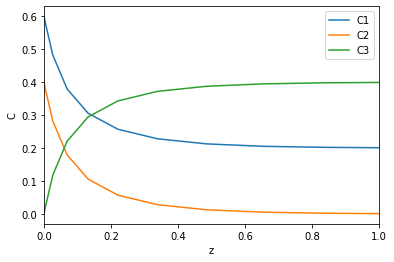

In [1]:
# import required packages
import math
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# introduce the parameters u and kAB
# velocity u in the reactor tube in m/s
u = 4.0
# reaction kinetic coefficient in m3/(mol s)
# the units of the reaction kinetic coefficient depend on the order of the chemical reaction
kAB = 1.0e2

# define the reaction rate model as a function. It returns a list of reaction rates depending on the concentrations.
def simple_reaction(C, k):
    # C is a list containing the concentrations of all species
    # Elements of a list can be accessed with square brackets []
    # remember that in Python the numbering of lists and arrays starts with 0 (unlike in Matlab, for instance)
    r = k * C[0] * C[1]
    # put the reaction rates in a list and return it
    return [-r, -r, r]

# next define the plug flow reactor model
def plug_flow_reactor(z, C, u, model_param, reaction_model):
    # the model is very simple. Divide all reaction rates by the velocity
    return [r / u for r in reaction_model(C, model_param)] 

# define initial values for C and the span for calculation (0 to 1 m), where 1 m is the length of the reactor tube
C0 = [0.6, 0.4, 0.0]
span = [0.0, 1.0]

# solve the problem and plot the solution
# note how we can pass parameters to the function using the args keyword argument of solve_ivp
sol = solve_ivp(plug_flow_reactor, span, C0, args = (u, kAB, simple_reaction))

# for quick plotting we can use matplotlib.pyplot that provides a Matlab-like plotting interface
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))
plt.show()

To be honest that's not a very interesting chemical reaction. However what if we have an equilibrium where component C decomposes to A and C? Then the rate equations would look like this:
\begin{align}
r_A &= -k_{AB} C_A C_B + k_C C_C \\
r_B &= -k_{AB} C_A C_B + k_C C_C\\
r_C &= k_{AB} C_A C_B - k_C C_C
\end{align}

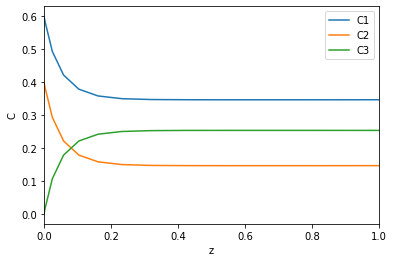

In [2]:
# define the reaction rate model. It returns a list of reaction rates depending on the concentrations.
# Notice how now k is a list
def equilibrium_reaction(C, k): 
    r1 = k[0] * C[0] * C[1]
    r2 = k[1] * C[2]
    return [-r1 + r2, -r1 + r2, r1 - r2]

# we can reuse the plug-flow reactor model
# def plug_flow_reactor_2(z, C, u, k): 
#    return [r / u for r in reaction_rates_2(C, k)] 

k_2 = [1.0e2, 0.2e2]

#initial concentrations and span as before

sol = solve_ivp(plug_flow_reactor, span, C0, args = (u, k_2, equilibrium_reaction))

#Let's plot the results
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))
plt.show()

Of course we don't get full conversion of the limiting reactant anymore but the entire reaction comes to an equilibrium. Let's do one more example where there is a reaction between species C and A.

A + B -> C and C + B -> D

\begin{align}
r_A &= -k_{AB} C_A C_B \\
r_B &= -k_{AB} C_A C_B \\
r_C &= k_{AB} C_A C_B - k_{CB} C_C C_B\\
r_D &= k_{CB} C_C C_B
\end{align}


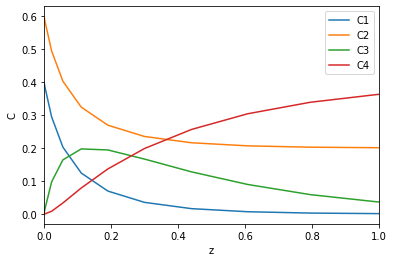

In [3]:
# define the reaction rate model. It returns a list of reaction rates depending on the concentrations.
# Notice how now k is a list
def simple_reaction_2(C, k): 
    r1 = k[0] * C[0] * C[1]
    r2 = k[1] * C[2] * C[1]
    return [-r1, -r1, r1 - r2, r2]

k_2 = [1.0e2, 0.5e2]

# now we have four species, so the list of initial concentrations must also have length 4
C0 = [0.4, 0.6, 0, 0]

sol = solve_ivp(plug_flow_reactor, span, C0, args = (u, k_2, simple_reaction_2))

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.plot(sol.t, sol.y[3,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3", "C4"])
plt.xlim((0., 1.0))
plt.show()

### Adiabatic plug flow reactor

Until now we have assumed our reactors to be isothermal, meaning that the temperature is constant. This is also often true for small laboratory reactors where temperature can be exactly controlled. In large industrial reactors this can usually not be achieved. Those are usually insulated so that they can be modeled as adiabatic reactors, meaning that there is no exchange of heat with the surroundings. In order to model this we need to take the heat balance into the equation. The temperature dependence of chemical reactions is described by the Arrhenius equation:

$r = Ae^\frac{-E_a}{RT}$

where $A$ is the pre-exponential factor, $E_a$ is the activation energy, $R$ is the universal gas constant, and $T$ is temperature in Kelvin.
The energy balance of the reactor is expressed very similarly to the mole balance, but this time we substitute $\rho C_p T$ for $\Psi$ and the source term is the enthalpy change $\Delta H$. Then our model equation becomes
\begin{equation}
0 = - u \frac{d \left(\rho C_p T\right)}{d z} + \Delta H
\end{equation}
And if we can assume $\rho$ and $C_p$ constant
\begin{equation}
0 = - u \rho C_p \frac{dT}{d z} + \Delta H
\end{equation}
And the 4th equation in our plug flow reactor model becomes:
\begin{equation}
\frac{dT}{d z} = \frac{\Delta H}{u \rho C_p}
\end{equation}
where
\begin{equation}
\Delta H = \sum_{i=1}^n r_i H_i
\end{equation}

We put all the variables into a vector $Y = \left(C_i H \right)$ and the changes into a vector $dY$.

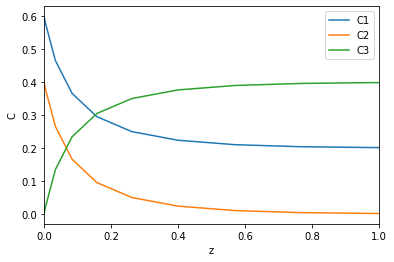

In [4]:
import scipy.constants as const

# function for the Arrhenius equation
def arrh(A, Ea, T): 
    return A * math.exp(-Ea/(const.R * T))

# temperature dependent reaction kinetics
def simple_reaction_3(C, k, T):
    r = arrh(k[0], k[1], T) * C[0] * C[1]
    return [-r, -r, r]

# function to calculate enthalpy change due to reaction
# here an extremely simple model is assumed, but a more sophisticated model could be used easily
def calc_DeltaH(r):
    H_A = 0.
    H_B = -100.
    H_C = -300.
    return -r[0] * H_A - r[1] * H_B + r[2] * H_C

# adiabatic plug flow reactor model
def adiabatic_plug_flow_reactor(z, Y, u, model_param, reaction_model, rho, Cp):
    C = Y[0:2]
    T = Y[3]
    r = reaction_model(C, model_param, T)
    deltaH = calc_DeltaH(r)
    # temperature change due to reaction
    dT = r[0] * deltaH / (u * rho * Cp)
    # concentration changes for the components
    dC = [rr / u for rr in r]
    # assemble the vector dY
    dY = dC
    dY.append(dT)
    return dY

k_3 = (100., 200.0)
rho = 900.
Cp = 4.
C0_2 = [0.6, 0.4, 0.0, 300.0]

sol = solve_ivp(adiabatic_plug_flow_reactor, span, C0_2, args = (u, k_3, simple_reaction_3, rho, Cp))

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))
plt.show()

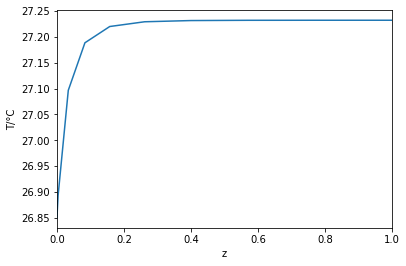

In [5]:
# convert temparature from K to °Cs
TinC = [t - 273.15 for t in sol.y[3,:]]
plt.plot(sol.t, TinC)
plt.xlabel("z")
plt.ylabel("T/°C")
plt.xlim((0., 1.0))
plt.show()

### A technically more useful plug flow reactor model

For reactions in the gas phase or for multiphase reactors where one of the flowing phases through the reactor is gaseous, the form of the equations with concentration as variable is not very convenient. That is because the volume of the fluid changes with with changing temperature and due to stoichiometry. Instead, it is favorable to do a change of variables $uC = F$ where $[F]=mol m^{-2} s^{-1}$. (Equally well we could use $\dot{N} = FA$ where A is the cross-section area of the reactor.) More technically this kind of Flowrate divided by cross section is called a flux. We will encounter fluxes later in other places.

Let's recall the convection-diffusion equation from the beginning:

\begin{equation}
\frac{\partial C}{\partial t} = - \frac{\partial \left(uC\right)}{\partial z} + \frac{\partial}{\partial z}\left(D\frac{\partial C}{\partial z}\right) + S\left(\psi,z\right)
\end{equation}

And let's assume again steady state, no axial dispersion (D = 0), and substitute F for $uC$:

Then the model equation becomes:

\begin{equation}
0 = - \frac{d F_i}{d z} + R\left(p_{i...n},T\right)
\end{equation}

Here we have assumed that the Reaction rate R depends on the partial pressures of the species. Rearranging the equation and we can again easily solve using and ODE solver:

\begin{equation}
\frac{d F_i}{d z} = R\left(p_{i...n},T\right)
\end{equation}

This is a form of the plug flow reactor model than can be found in text books very often. But actually it can be easily derived from the convection-diffusion equation.

Let's look at an example. Let's look again at a reaction A + B -> C but this time in the gas phase. This means that volume changes during the reaction. This time the reaction terms shall depend on partial pressures of the components:

\begin{align}
r_A &= -k_{AB} p_A p_B \\
r_B &= -k_{AB} p_A p_B \\
r_C &= k_{AB} p_A p_B
\end{align}

where $p_i = x_iP$ where P is total pressure and $x_i = \frac{F_i}{\sum_{j=1}^n F_j}$. Of course this form also works for liquid phase. Then simply $C_i = x_iC_{tot}$.

Let's also include enthalpy change in our equations. For that we define a variable that for lack of a better word we can call "Enthalpy flux": $E = FH$ with units $[kJ s^{-1} m^2]$ where H is the molar enthalpy in $[kJ/mol]$.

The equation for enthalpy flux then is:

\begin{equation}
\frac{d E}{d z} = \sum_{i=1}^n r_i H_i
\end{equation}

And to make our model complete we should also have a model for pressure drop. Pressure drop can either be calculated with a correlation, or it can be assumed constant. In gas-phase technical reactors pressure drop is often negligible in comparison with the total pressure. Here we assume the pressure drop to be constant.

\begin{equation}
\frac{d P}{d z} = const.
\end{equation}

Now our variables are complete. The target vector containing the variables is

\begin{equation}
Y = \left(F_i E P\right)
\end{equation}

which accounts for n + 2 variables where n is the number of components in the system.

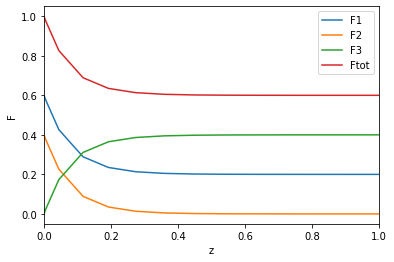

In [6]:
# import required packages
import math
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

# define the reaction rate parameters and pressure (in kPa) and initial temperature (in K)
k = [1.0e-3, 200.]
P0 = 150.
T0 = 350.
dpdz = 10.

# physical properties: density rho in kg/m3 and themal capacity Cp in J/(mol K)
rho = 10.
Cp = 1.5

# function for the Arrhenius equation
def arrh(A, Ea, T): 
    return A * math.exp(-Ea/(const.R * T))

# define the reaction rate model. It returns a list of reaction rates depending on partial pressures of the components.
def reaction_rates_gas(x, k, T, P): 
    r = arrh(k[0], k[1], T) * x[0] * x[1] * P * P
    return [-r, -r, r]

# function to calculate enthalpy change due to reaction
def calc_DeltaH(r):
    H_A = 0.
    H_B = -100.
    H_C = -300.
    return -r[0] * H_A - r[1] * H_B + r[2] * H_C

# define the plug flow reactor model
def plug_flow_reactor_gas(z, Y, dpdz, model_param, reaction_model): 
    F = Y[0:-2]
    H = Y[-2] / F.sum()
    P = Y[-1]
    Ftot = F.sum()
    x = [f / Ftot for f in F]
    T = H / Cp
    r = reaction_model(x, model_param, T, P)
    dH = calc_DeltaH(r)
    dP = -dpdz
    dY = r
    dY.append(dH)
    dY.append(dP)
    return dY

# define initial values for C and the span for calculation (0 to 1)
F0 = [0.6, 0.4, 0.0]
Y0 = F0
H0 = sum(F0) * Cp * T0
Y0.append(H0)
Y0.append(P0)
span = [0.0, 1.0]
# solve the problem and plot the solution
# note how we can pass parameters to the function using the args keyword argument of solve_ivp
sol = solve_ivp(plug_flow_reactor_gas, span, F0, args = (dpdz, k, reaction_rates_gas))
Ftot = np.sum(sol.y[0:3, :], axis = 0)
# for quick plotting we can use matplotlib.pyplot that provides a Matlab-like plotting interface
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])

plt.plot(sol.t, Ftot)
plt.xlabel("z")
plt.ylabel("F")
plt.legend(["F1", "F2", "F3", "Ftot"])
plt.xlim((0., 1.0))
plt.show()

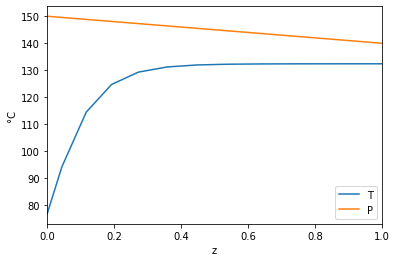

In [10]:
E = sol.y[3,:]
P = sol.y[4,:]
H = E / Ftot
T = H / Cp - 273.15
plt.plot(sol.t, T)
plt.plot(sol.t, P)
plt.xlabel("z")
plt.ylabel("°C")
plt.legend(["T", "P"])
plt.xlim((0., 1.0))
plt.show()

With this, we have already written a complete plug flow reactor model that can be used to model technical reactors realistically. What remains is to plug in models for physical properties, reaction kinetics, and possibly mass transfer.